In [ ]:
# Hafizh Mulya H. - 18117030
# Update: 20 Agustus 2021
# Tugas Mata Kuliah II4035 Sistem Cerdas
# Image Recognition
# Juga tersedia di https://colab.research.google.com/drive/1bFPgEyoISCrqJbMGIwFHD37vNXYtJB3x?usp=sharing

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, backend
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray, expand_dims, argmax
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=df97806c63fc5fd393a4b4a4086c21519d8b6a47d21a16e2e95eec44a0038da4
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
# Split data dan label dari Cifar10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Definisi label, terurut dari Cifar10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Normalisasi nilai piksel menjadi [0,1]
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


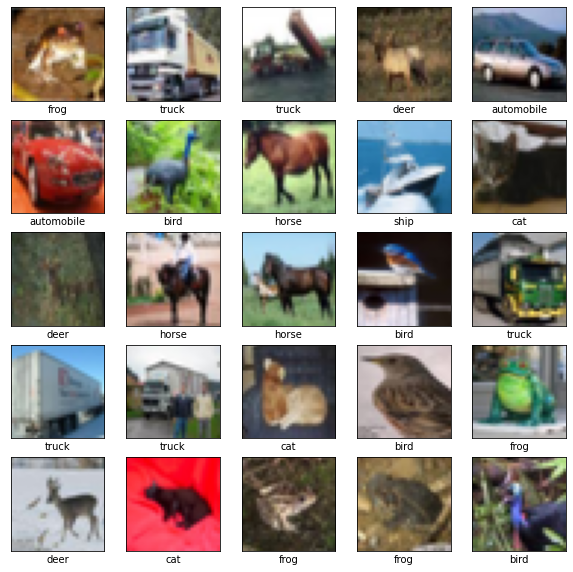

In [ ]:
# Plot 25 data pertama
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# Penambahan layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
# Layers summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
# Training
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 69s 43ms/step - loss: 1.7727 - accuracy: 0.3458 - val_loss: 1.2966 - val_accuracy: 0.5389
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2526 - accuracy: 0.5528 - val_loss: 1.1459 - val_accuracy: 0.6005
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0699 - accuracy: 0.6210 - val_loss: 1.0443 - val_accuracy: 0.6292
Epoch 4/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9621 - accuracy: 0.6629 - val_loss: 0.9453 - val_accuracy: 0.6669
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8843 - accuracy: 0.6903 - val_loss: 0.9436 - val_accuracy: 0.6722
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.8228 - accuracy: 0.7125 - val_loss: 0.9153 - val_accuracy: 0.6837
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7617 - accuracy: 0.7336 - val_loss: 0.8724 -

313/313 - 4s - loss: 0.8639 - accuracy: 0.7032


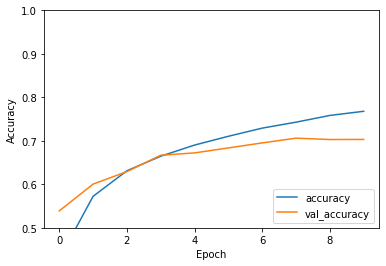

In [ ]:
# Performa
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
# Akurasi
print(test_acc)

0.7031999826431274


https://github.com/YoongiKim/CIFAR-10-images/raw/master/train/airplane/0030.jpg
https://github.com/YoongiKim/CIFAR-10-images/raw/master/train/automobile/0030.jpg
https://github.com/YoongiKim/CIFAR-10-images/raw/master/train/bird/0030.jpg
https://github.com/YoongiKim/CIFAR-10-images/raw/master/train/cat/0030.jpg
https://github.com/YoongiKim/CIFAR-10-images/raw/master/train/deer/0030.jpg
https://github.com/YoongiKim/CIFAR-10-images/raw/master/train/dog/0030.jpg
https://github.com/YoongiKim/CIFAR-10-images/raw/master/train/frog/0030.jpg
https://github.com/YoongiKim/CIFAR-10-images/raw/master/train/horse/0030.jpg
https://github.com/YoongiKim/CIFAR-10-images/raw/master/train/ship/0030.jpg
https://github.com/YoongiKim/CIFAR-10-images/raw/master/train/truck/0030.jpg
airplane030.jpg    cat030.jpg	frog030.jpg   ship030.jpg
automobile030.jpg  deer030.jpg	horse030.jpg  truck030.jpg
bird030.jpg	   dog030.jpg	sample_data


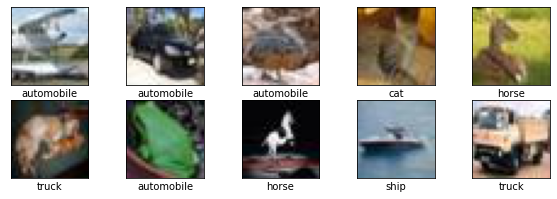

In [ ]:
# Tampilan gambar sesuai NIM (030)
!rm *.jpg*
nims = ["030"] #misal tidak hanya 1 file yang ingin dicoba, seperti ["030", "031", ...]
plt.figure(figsize=(10,10))
i=0
for nim in nims:
  for name in class_names:
    url = "https://github.com/YoongiKim/CIFAR-10-images/raw/master/train/"+name+"/0"+nim+".jpg"
    savename = name+nim+".jpg"
    print(url)
    wget.download(url, out=savename)
    imgopen = asarray(Image.open(savename))
    
    img = tf.io.read_file(savename)
    img = tf.image.decode_jpeg(img, channels=3)
    img.set_shape([None, None, 3])
    img = tf.image.resize(img, (32, 32))
    img = expand_dims(img, 0) # make 'batch' of 1

    pred = model.predict(img)
    lab = class_names[argmax(pred)]

    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imgopen, cmap=plt.cm.binary)
    plt.xlabel(lab)
    i+=1
!ls
plt.show()